In [1]:
from mats_utils.rawdata.read_data import read_MATS_data
import datetime as DT
import numpy as np
import pandas as pd
import gc
import os


level = '1b'

start_time = DT.datetime(2023, 2, 2, 0, 0, 0)
stop_time = DT.datetime(2023, 2, 3, 0, 0, 0)

# load data
filter = {'CCDSEL': [1, 1], 'TPlat': [-90, -70]}
data = read_MATS_data(start_time, stop_time, level=level, version='0.5', filter=filter)


ops-payload-level1b-v0.5


In [2]:
tplat=data.TPlat
tplon=data.TPlon
mtime=pd.to_datetime(data.EXPDate)

/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprec

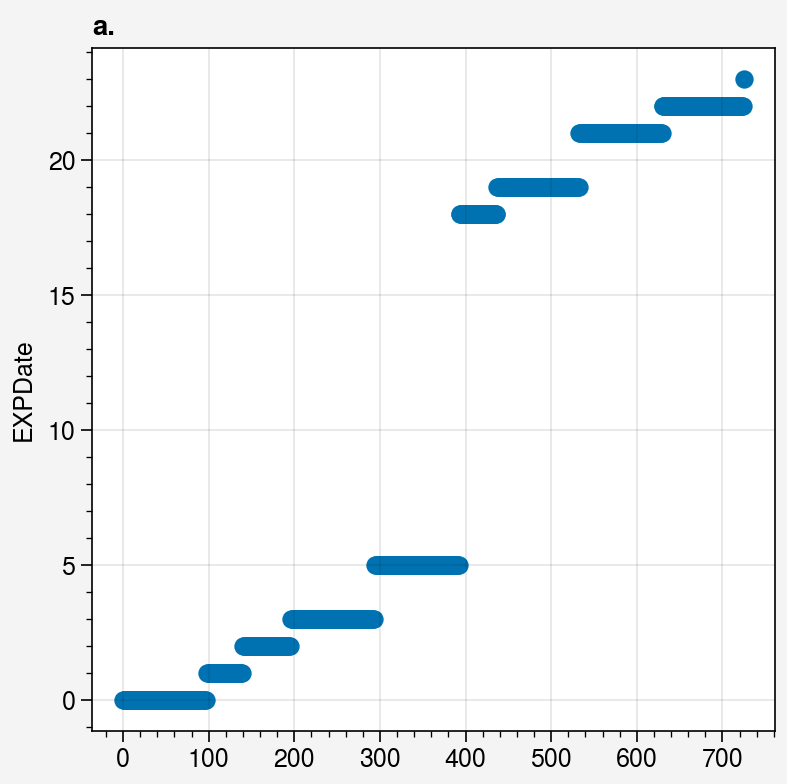

In [3]:
import proplot as pplt
fig, axs = pplt.subplots(figwidth='10cm',ncols=1, nrows=1,abc='a.',sharex=0)
axs[0].scatter(mtime.dt.hour)
#axs[0].scatter(mtime.dt.time.values)


In [75]:
mtime.dt.minute/60

0      0.316667
1      0.316667
2      0.316667
3      0.316667
4      0.316667
         ...   
721    0.983333
722    0.983333
723    0.983333
724    0.983333
725    0.000000
Name: EXPDate, Length: 726, dtype: float64

/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


cips_sci_2_orbit_86617_2023-033_v05.20_r05_cat.nc
cips_sci_2_orbit_86618_2023-033_v05.20_r05_cat.nc
cips_sci_2_orbit_86619_2023-033_v05.20_r05_cat.nc


/tmp/ipykernel_225088/604265246.py:36: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axst.set_ylim([15,24])


/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprec

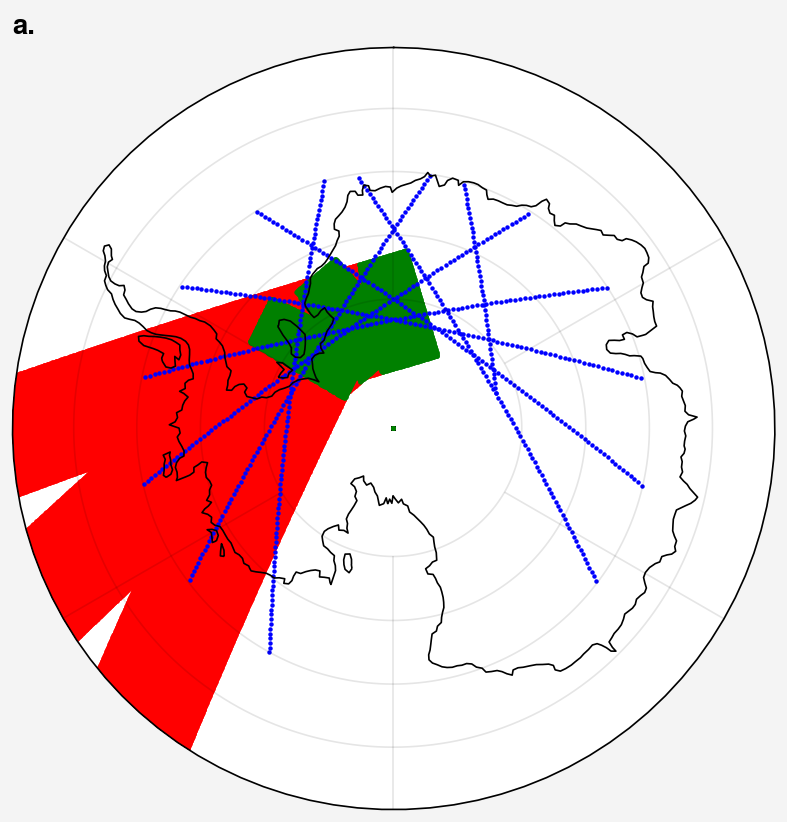

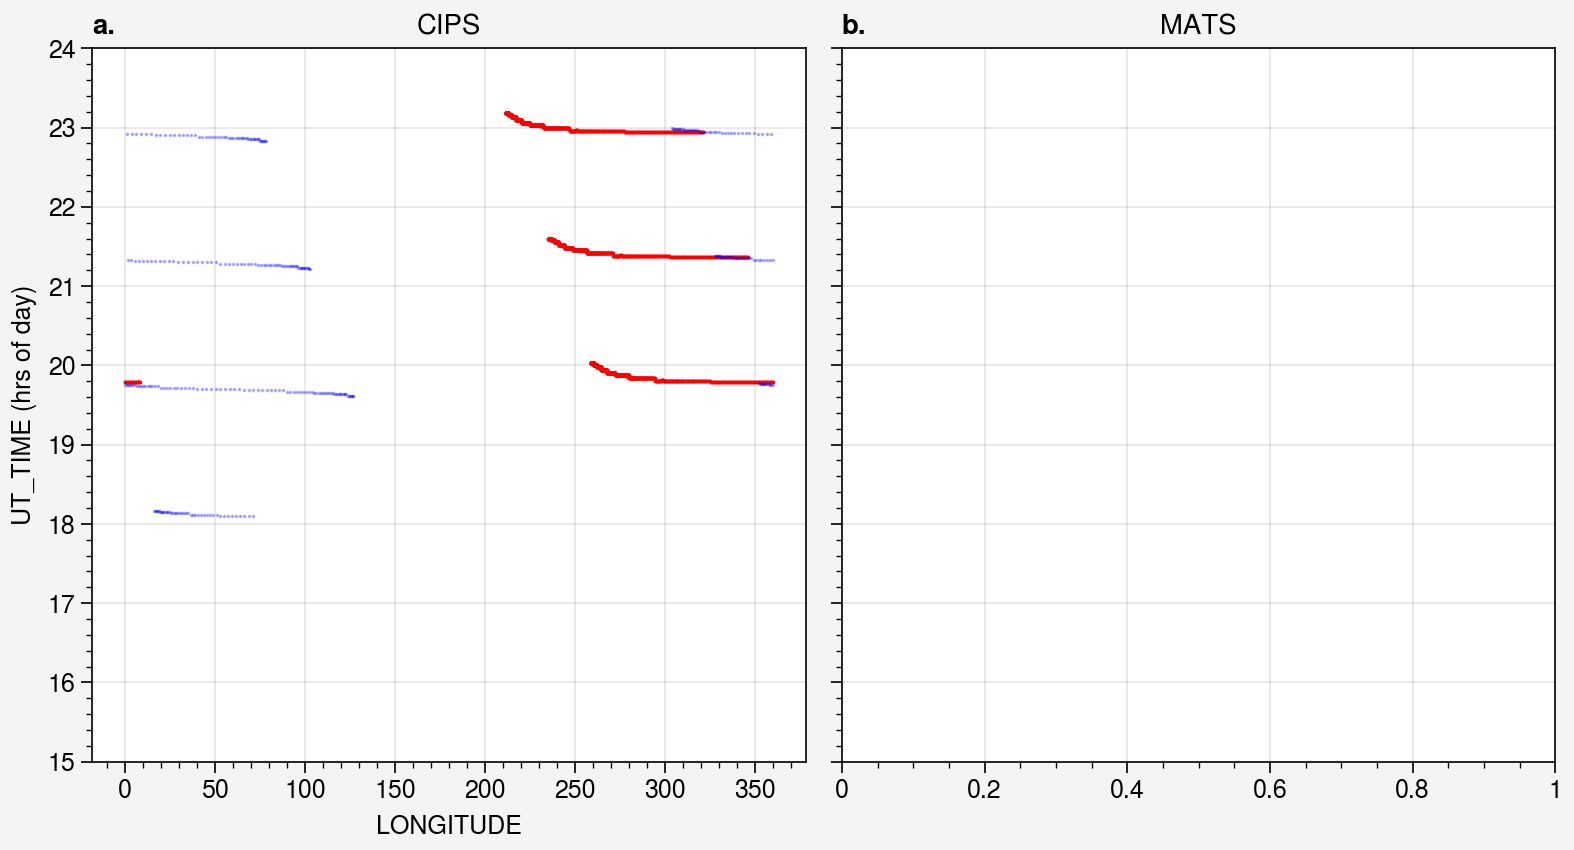

In [40]:
import proplot as pplt
import xarray as xr
import os


directory = '/home/waves/projects/MATS/CIPS_MATS/data/level_2_subset'

fig, axs = pplt.subplots(figwidth='10cm',ncols=1, nrows=1,abc='a.',sharex=0,proj='splaea')
axs.format(coast=True, boundinglat=-60,landzorder=5)

#time plot
figt, axst = pplt.subplots(figwidth='20cm',ncols=2, nrows=1,abc='a.',sharex=0)

for filename in sorted(os.listdir(directory))[-4:-1]:
    print(filename)

    cips=xr.open_dataset(directory+'/'+filename)

    # ascending node
    a = cips.LATITUDE.where(cips.LATITUDE < -90) 
    c = -180 - a

    # plot ascending node
    axs[0].scatter(cips.LONGITUDE,c,s=1,c='red',alpha=1)

    # descending node
    a = cips.LATITUDE.where(cips.LATITUDE > -90) 

    # plot descending node
    axs[0].scatter(cips.LONGITUDE,a,s=1, c='green',alpha=1)

    axst[0].scatter((cips.LONGITUDE[50,:]+360)%360,cips.UT_TIME[50,:],s=0.5,color='red')

axst[0].scatter(tplon,mtime.dt.hour + mtime.dt.minute/60,s=0.5,color='blue',alpha=0.25)

axst.set_ylim([15,24])
axst[0].format(title='CIPS')
axst[1].format(title='MATS')

axs[0].scatter(tplon,tplat,s=1, c='blue',alpha=1)



In [24]:
cips.UT_DATE.values

array(b'20230202', dtype='|S24')